## China as a Global Creditor - a Data Exercise

#### 1. China’s International Investment Position 
Visit the website of China’s State Administration of Foreign Exchange (SAFE) and download time series data on China’s International Investment Position.

Loading, transforming and cleaning the data:

In [49]:
import pandas as pd
import numpy as np

# Import Excel
SAFE_data_raw = pd.read_excel(
    r"C:\Users\jonaw\OneDrive\Dokumente\Coding\Computational Economics"
    r"\Data Viz\China as a Global Creditor - a Data Excercise"
    r"\data\The time-series data of International Investment Position of China.xlsx",
    sheet_name="Annual(USD)",
    header=2
)

# Replace / with NaN
SAFE_data_raw.replace("/", np.nan, inplace=True)
SAFE_data_raw = SAFE_data_raw.infer_objects()

# Create side for Assets and Liabilities
SAFE_data_raw['Side'] = (
    SAFE_data_raw['Item']
      .where(SAFE_data_raw['Item'].isin(['Assets','Liabilities']))
      .ffill()
)


# Drop first row and rows from 50
SAFE_data_raw = SAFE_data_raw.iloc[1:].reset_index(drop=True)
SAFE_data_raw = SAFE_data_raw.iloc[:50].copy()

# Check if the last row is correct
SAFE_data_raw.tail()



C:\Users\jonaw\AppData\Local\Temp\ipykernel_19212\3166367532.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SAFE_data_raw.replace("/", np.nan, inplace=True)


,Item,end-2004,end-2005,end-2006,end-2007,end-2008,end-2009,end-2010,end-2011,end-2012,...,end-2016,end-2017,end-2018,end-2019,end-2020,end-2021,end-2022,end-2023,end-2024,Side
45,4.3 Loans,880.479446,869.878836,984.795590,1033.490335,1029.946605,1635.935924,2388.903419,3723.837820,3679.845576,...,3205.300663,3921.634464,4169.276545,4604.718066,4413.939253,4494.911130,3832.352353,3588.672696,3259.865566,Liabilities
46,"4.4 Insurance, pension, and standardized guara...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,88.214142,99.594517,109.457953,134.617278,167.521862,234.777572,267.598971,268.954351,284.941510,Liabilities
47,4.5 Trade credit and advances,809.167798,1063.283036,1195.553505,1486.553505,1296.062792,1616.641211,2111.790000,2492.059100,2915.246576,...,2883.000000,3523.000000,3931.000000,3643.500000,3719.000001,4228.420004,3826.000000,3911.000002,4006.999998,Liabilities
48,4.6 Other accounts payable,199.938977,257.203655,376.641653,466.859675,551.716255,226.870984,222.494748,106.235383,276.991655,...,408.030437,187.869028,153.873763,188.541657,263.008098,304.815478,357.562218,724.507553,870.072594,Liabilities
49,4.7 Special drawing rights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.310000,107.425636,...,93.964231,99.541987,97.211631,96.655254,100.674873,506.735555,481.846060,485.767187,472.175394,Liabilities


In [50]:
# Transform the data to long format
SAFE_data_long = (
    SAFE_data_raw
      .melt(id_vars=['Side','Item'], var_name='Year', value_name='Value')
      .rename(columns={'Item':'Category'})
)

# Clean up Year: remove “end-” and make it integer
SAFE_data_long["Year"] = (
    SAFE_data_long["Year"]
      .str.replace("end-", "", regex=False)
      .astype(int)
)

# Set value to numeric
SAFE_data_long["Value"] = pd.to_numeric(SAFE_data_long["Value"], errors="coerce")

SAFE_data_long.head()


,Side,Category,Year,Value
0,NaN,Net International Investment Position,2004,2407.831855
1,Assets,Assets,2004,9361.972409
2,Assets,1 Direct investment,2004,596.393975
3,Assets,1.1 Equity and investment fund shares,2004,583.393475
4,Assets,1.2 Debt instruments,2004,13.000500


1a. Is China a net creditor or a net debtor towards the rest of the world? How has its net asset position evolved over the past 20 years?

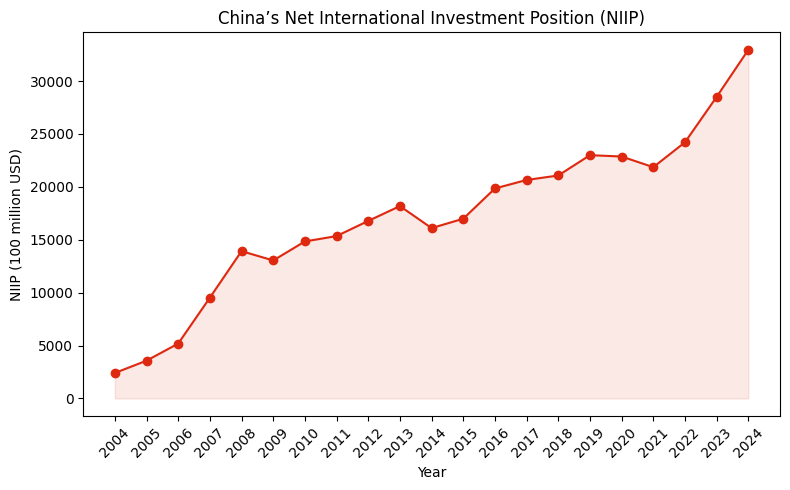

NIIP change (2004-2024):1268.77%


In [47]:
import matplotlib.pyplot as plt
# Define the Net International Investment Position (NIIP) (Assets - Liabilities)
niip = SAFE_data_long[SAFE_data_long["Category"] == "Net International Investment Position"]

plt.figure(figsize=(8,5))
plt.plot(niip.Year, niip.Value, 'o-', color="#DE2910" )

# Set x-ticks
plt.xticks(niip.Year, rotation=45)

# Shade under the line
plt.fill_between(niip.Year,niip.Value,color="#DE2910",alpha=0.1)

plt.title("China’s Net International Investment Position (NIIP)")
plt.xlabel("Year")
plt.ylabel("NIIP (100 million USD)")
plt.tight_layout()
plt.show()

# grab 2004 and 2024
NIIP_2004 = niip.loc[niip.Year == 2004, "Value"].item()
NIIP_2024= niip.loc[niip.Year == 2024, "Value"].item()

NIIP_change  = (NIIP_2024 / NIIP_2004 - 1) * 100
print(f"NIIP change (2004-2024):{NIIP_change:.2f}%")

**Answer 1.a** : Over the last twenty years China has been a net creditor for the rest a the world, as its external assets exceeds its liabilities by far. The NIIP increased by about 1.268% (not inflation-adjusted).

1b. Show graphically how the composition of China’s external assets and liabilities looked in 2007 at the onset of the Global Financial Crisis and how it looks today. Explain how China’s investments and liabilities have evolved over time. Which types of assets and liabilities have become more or less important?